<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/PAAD_DecissionTree_Treatment_type_withTreatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PAAD - DecissionTree - Treatment type
author: jose.bobes at udc.es



In [6]:
# Importing Required Libraries

import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

Python: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [56]:
# Loading Data
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/Libro1_Adapted.csv"
columns = ['ns10:file_uuid','ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage', 'ns5:vital_status', 'ns5:days_to_death', 'therapy_type']

dataset = pd.read_csv(url, sep=';', usecols=columns, encoding = "ISO-8859-1")

print(dataset.shape)
print(dataset.head())

(205, 11)
                         ns10:file_uuid ns2:gender                   ns5:race  \
0  1AF64746-0F41-408F-9CB3-D567BEBA1217     FEMALE                      WHITE   
1  0D7B23AC-0988-4E95-9AF3-82180A1DAB0A     FEMALE                      WHITE   
2  290AC731-F653-432D-8C35-8E6C178BD2C6     FEMALE                      WHITE   
3  E2FC1DD6-0B4D-409D-9D1C-0F8E0ADB6113     FEMALE  BLACK OR AFRICAN AMERICAN   
4  40A76730-988D-4FF1-A17A-91AA85DD7C76       MALE                      WHITE   

   ns5:age_at_initial_pathologic_diagnosis ns3:pathologic_stage  \
0                                       53            Stage IIB   
1                                       54            Stage IIA   
2                                       58             Stage IV   
3                                       66            Stage IIA   
4                                       64            Stage IIA   

  ns3:pathologic_T ns3:pathologic_N ns3:pathologic_M ns5:vital_status  \
0               T3         

In [57]:
# Feature Selection
# Split dataset in features and target variables (REF: https://www.datacamp.com/tutorial/decision-tree-classification-python)
feature_cols = ['ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_T', 'ns3:pathologic_N', 'ns3:pathologic_M', 'ns3:pathologic_stage']
#feature_cols = ['ns2:gender', 'ns5:race', 'ns5:age_at_initial_pathologic_diagnosis', 'ns3:pathologic_stage']


X = dataset[feature_cols] # Features
X_encoded = pd.get_dummies(X)
y = dataset.therapy_type # Target variable

In [58]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [60]:
# Building Decision Tree Model

# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [61]:
# Evaluating Model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6290322580645161


In [62]:
# Optimizing the accuracy

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6,10]:
        for min_samples_leaf in [2, 5, 10, 20, 30]:
            dtree = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = metrics.accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

print("Accuracy: ", best_acc)
print("Params: ", best_params)

Accuracy:  0.6935483870967742
Params:  criterion: gini, max_depth: 5, min_samples_leaf: 2


In [65]:
# Create the optimal classification tree
dtree = tree.DecisionTreeClassifier(max_depth=5, criterion='gini', min_samples_leaf=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

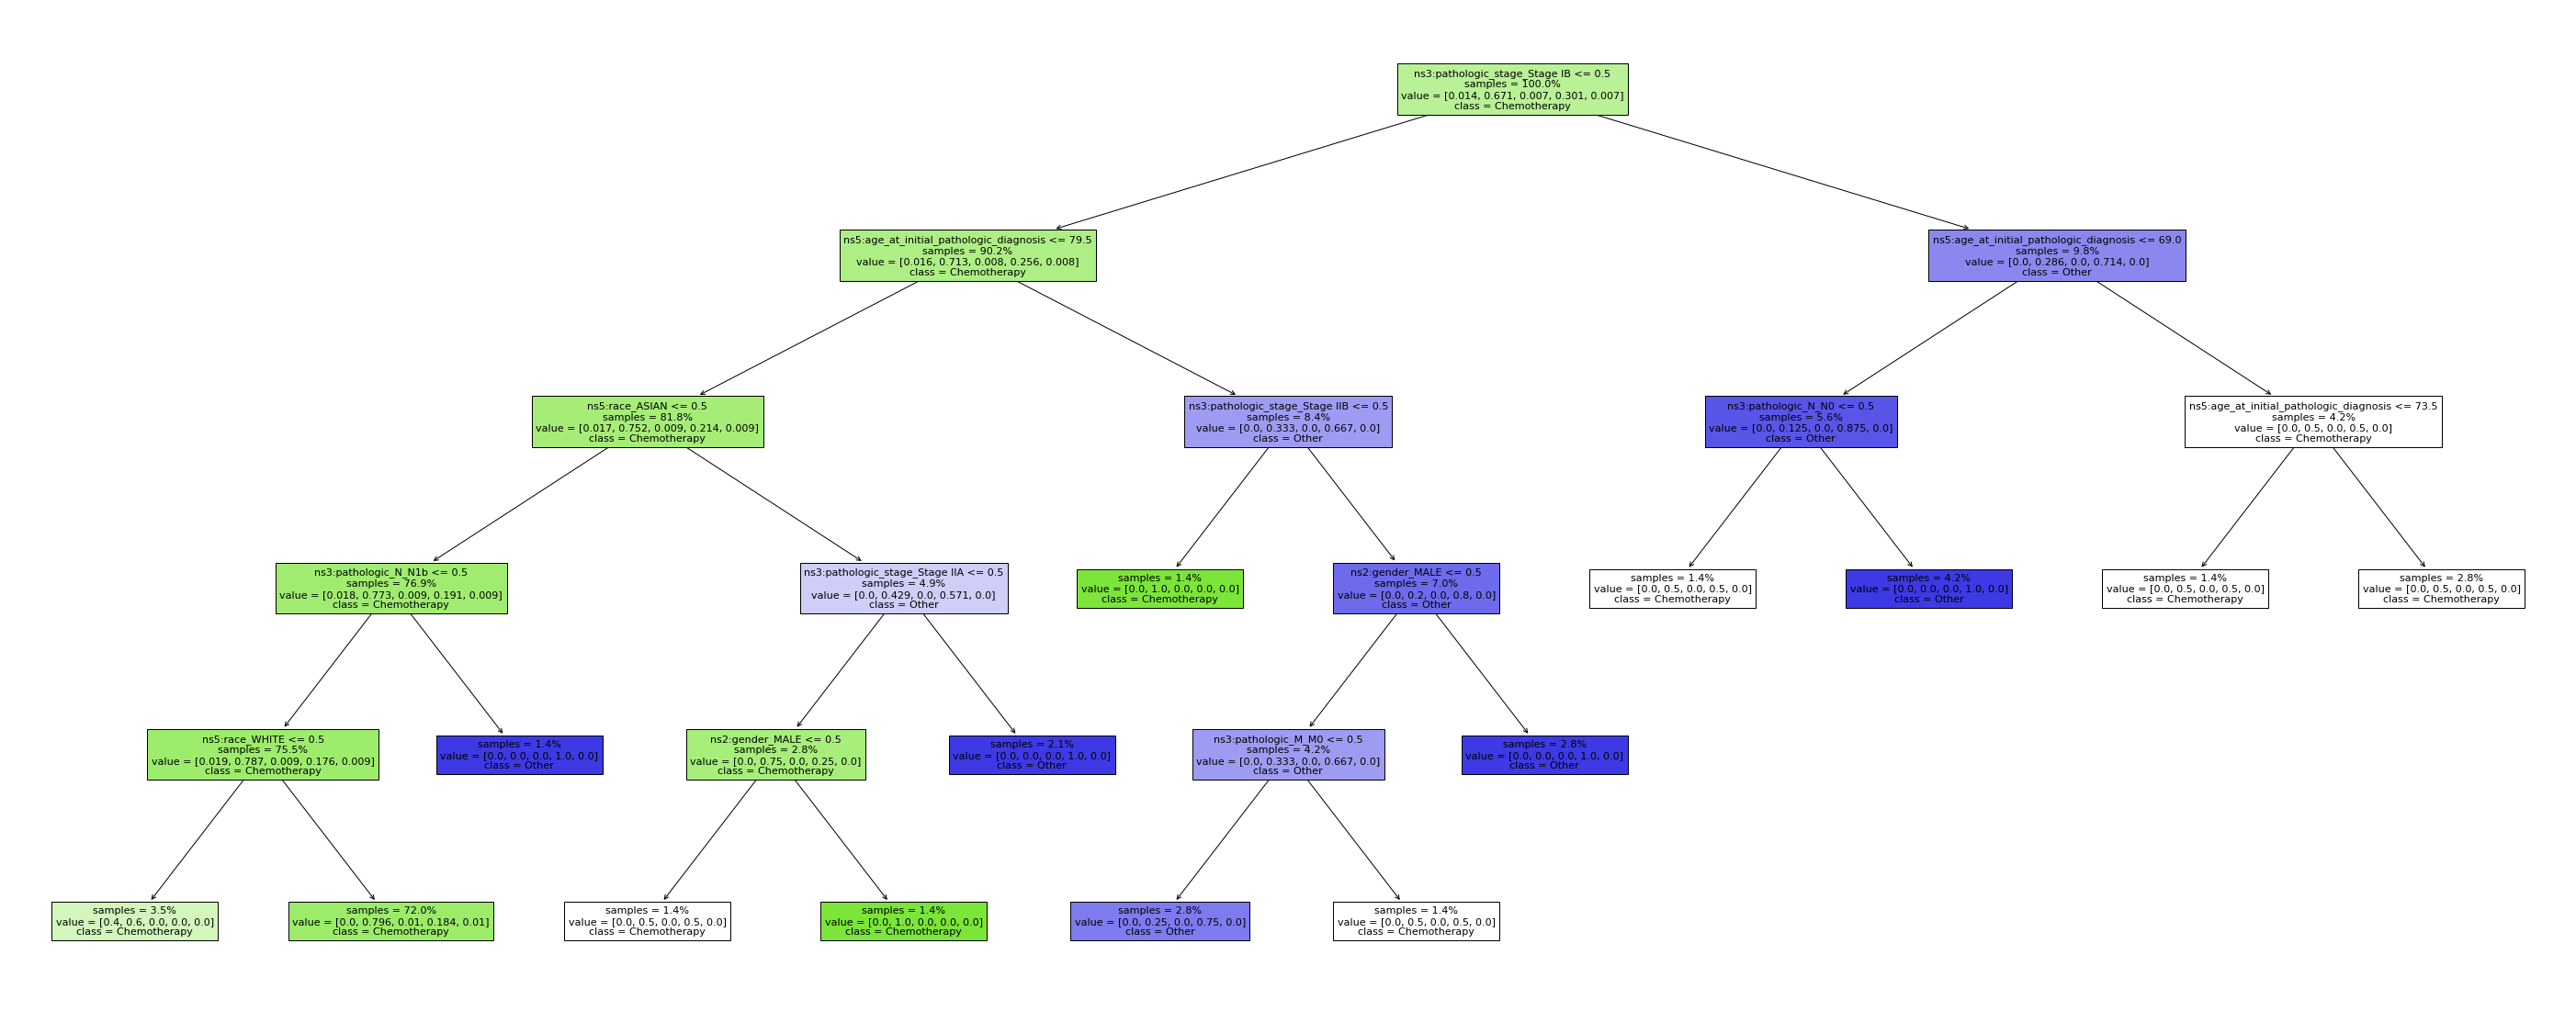

In [68]:
# Visualizing the decision tree

fig = plt.figure(figsize=((50,20)))
plot_tree(dtree,
            feature_names = X_encoded.columns,
            class_names=['Ancillary', 'Chemotherapy', 'Hormone Therapy', 'Other', 'Vaccine'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')